##  Video Game Sales电子游戏销售分析

### 项目背景

数据集来源于kaggle, 由VGChartz的销量信息和 Metacritic的评分信息整合而成，共有16598条数据，11个字段。通过此数据集，我们可大致了解全球视频游戏市场的变化。


字段说明：
* Rank - 全球总销量排名
* Name - 游戏名称
* Platform - 游戏发行平台类型 (例如：PC、PS4 等等)
* Year - 游戏发行年份
* Genre - 游戏类型
* Publisher - 游戏发行商（Nintendo任天堂、Activision暴雪、Ubisoft育碧）
* NA_Sales - 北美销量（单位：百万）(NA: North America)
* EU_Sales - 欧洲销量（单位：百万）(EU: Europe)
* JP_Sales - 日本销量（单位：百万）(JP：Japan)
* Other_Sales - 其他地区销量（单位：百万）
* Global_Sales - 全球总销量

适用场景：电商、游戏销售、常规销售数据

定义问题：
* 电子游戏行业近年来的发展状况
* 电子游戏市场分析：最受欢迎的游戏、发布平台、发行商、类型

In [323]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("white")
# 作图的字体默认设置
fontdict = {'fontsize': 15,
            'horizontalalignment': 'center'}

import warnings
warnings.filterwarnings('ignore')

In [324]:
df = pd.read_csv('/Users/lee/Desktop/vgsales.csv')
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [16]:
df.shape

(16598, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [325]:
#查看缺失值
pd.isnull(df).sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [326]:
#将缺失值删除
df = df.dropna()

In [327]:
pd.isnull(df).sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

查看年份最大值，发现异常值2020年（数据集为截止到2017年的数据）

In [328]:
df['Year'].max() 

2020.0

In [329]:
#查看2020年发行的游戏的相关信息
max_entry = df['Year'].idxmax()
max_entry = df.loc[max_entry]
pd.DataFrame(max_entry).T

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


查询后得知，该游戏于2009年发行，将异常值替换为2009

In [330]:
df['Year'] = df['Year'].replace(2020.0, 2009.0)
print("Max Year Value: ", year_data.max())

Max Year Value:  2017.0


In [331]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.404886,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.831475,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


从平均销量及销量最大值来看，北美市场表现最好；各地区的销量分布极其不均匀，波动较大。

### 可视化探索

####  1. 地区

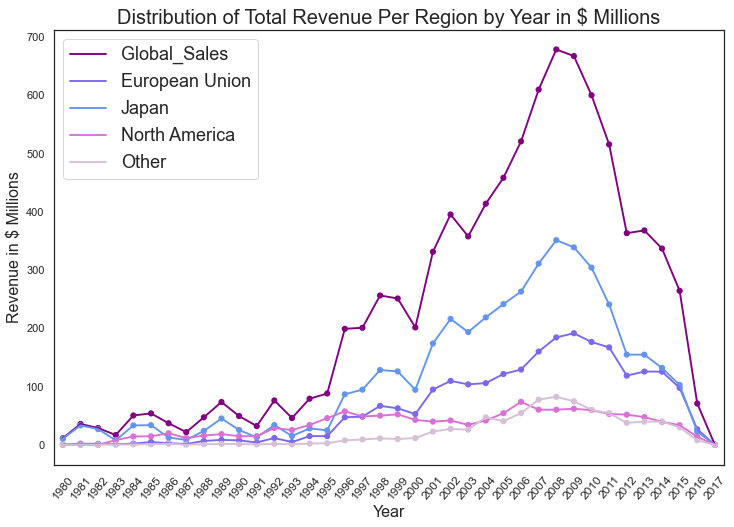

In [309]:
#折线图

GS = df.pivot_table('Global_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
EU = df.pivot_table('EU_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
NA = df.pivot_table('NA_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
JP = df.pivot_table('JP_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
Other = df.pivot_table('Other_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
years = Other.index.astype(int)
regions = ['Global_Sales','European Union','Japan','North America','Other']

plt.figure(figsize=(12,8))
ax = sns.pointplot(x=years, y=GS, color='purple', scale=0.7)
ax = sns.pointplot(x=years, y=EU, color='mediumslateblue', scale=0.7)
ax = sns.pointplot(x=years, y=NA, color='cornflowerblue', scale=0.7)
ax = sns.pointplot(x=years, y=JP, color='orchid', scale=0.7)
ax = sns.pointplot(x=years, y=Other, color='thistle', scale=0.7)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Total Revenue Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=18)
plt.show();

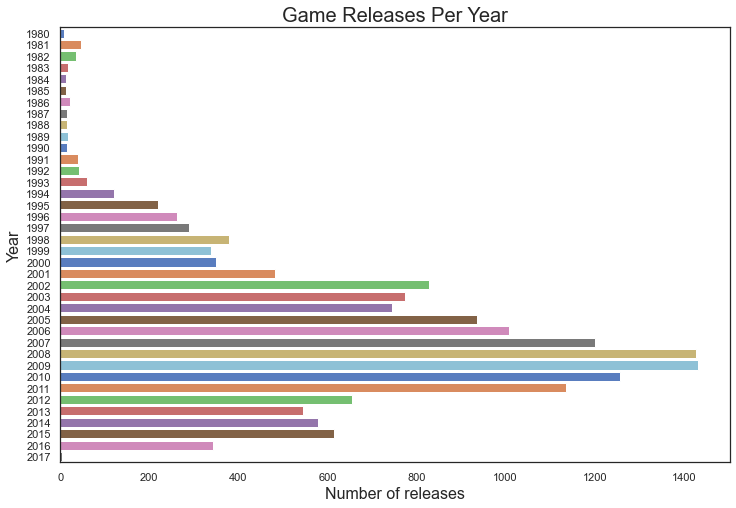

In [310]:
x = df.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

* 2008年是游戏的分水岭，游戏市场全球销售额从1995年开始激增，2008年达到峰值，随后即一路暴跌。
  1. 各地区并未同时在2008年达到销售峰值，欧洲在2009年达到峰值，而日本在2006年达到峰值。
  2. 全球游戏发行量在2009年达到峰值。
* 从地区划分来看，北美地区销售额遥遥领先
* 游戏市场发行量与销售额呈一定的正相关性

####  2. 游戏平台

In [311]:
# 全球电子游戏市场销售额排名
df_platcount = df.groupby(df['Platform'])[['Global_Sales']].sum().rename(columns = {'Global_Sales':'sum'}).sort_values('sum', ascending = False)

fig = px.bar(df_platcount, x=df_platcount.index, y='sum', color='sum',color_continuous_scale = ['rgba(17, 171, 122. 0.6)', 'rgba(17, 145, 171, 0.6)'], 
             height = 400, template="plotly_white")
fig.show()

In [163]:
# 游戏平台累计发行量
df_platcount = df.groupby(df['Platform'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)

fig = px.bar(df_platcount, x=df_platcount.index, y='counts', color='counts',color_continuous_scale=['rgba(17, 171, 122, 0.6)', 'rgba(17, 145, 171, 0.6)'],
              height=400, template="plotly_white")
fig.show()

In [176]:
# 游戏排名前10的平台
df_platcount10 = df[0:10].groupby(df['Platform'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)

fig = px.bar(df_platcount10, x = df_platcount10.index, y ='counts', color ='counts', color_continuous_scale = ['rgb(17, 171, 122, 0.6)', 'rgb(17, 145, 171, 0.6)'],
              height=400,template="plotly_white")
fig.show()

由以上可以看出：
* PS2是销售额最高的游戏平台，且发行量排名第二
* 市面上大部分受欢迎的游戏都被X360、PS3、Wli、DS、PS这几个平台控制着
* 尽管Wii销售额和发行量都不是最多，却制作出了高质量爆款的游戏，任天堂是一家强大的公司

### 3. 游戏发行商

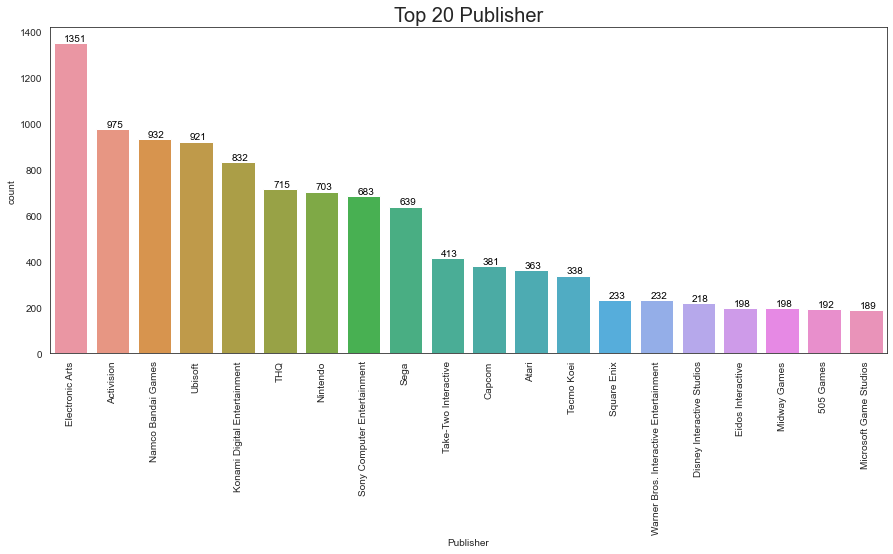

In [175]:
#发行量T0P20的发行商
top_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

plt.figure(figsize=(15, 6))
ax=sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
ax.set_title(label='Top 20 Publisher', fontsize=20)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

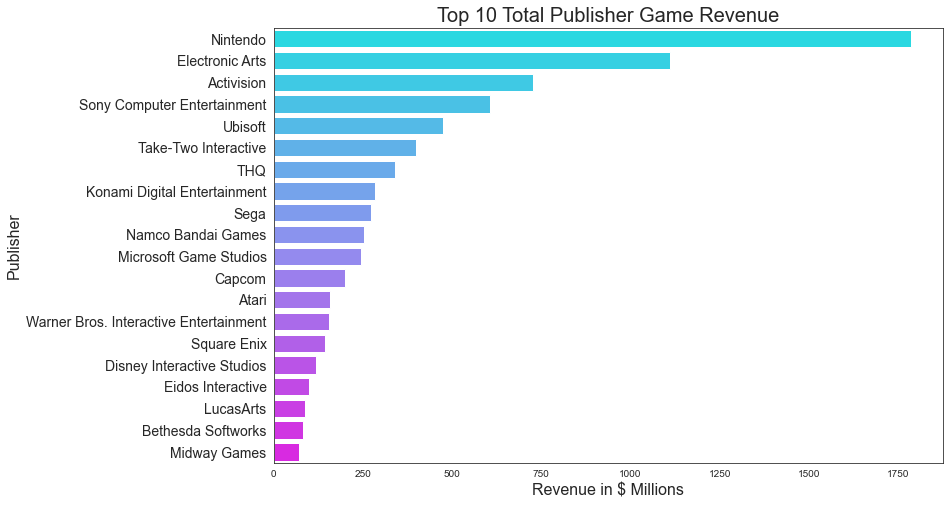

In [188]:
# 游戏收入TOP10的发行商
data = df.groupby(['Publisher']).sum()['Global_Sales']
data = pd.DataFrame(data.sort_values(ascending=False))[0:20]
publishers = data.index
data.columns = ['Global Sales']

colors = sns.color_palette("cool", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show()

In [187]:
# 排名前100的游戏中，各发行商所占权重
df_pubcount100 = df[:100].groupby(df['Publisher'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)

fig = px.pie(df_pubcount100 , names=df_pubcount100.index, values='counts', template='seaborn')
fig.update_traces(pull=[0.06,0.06,0.06,0.06,0.06], textinfo="percent+label")
fig.show()

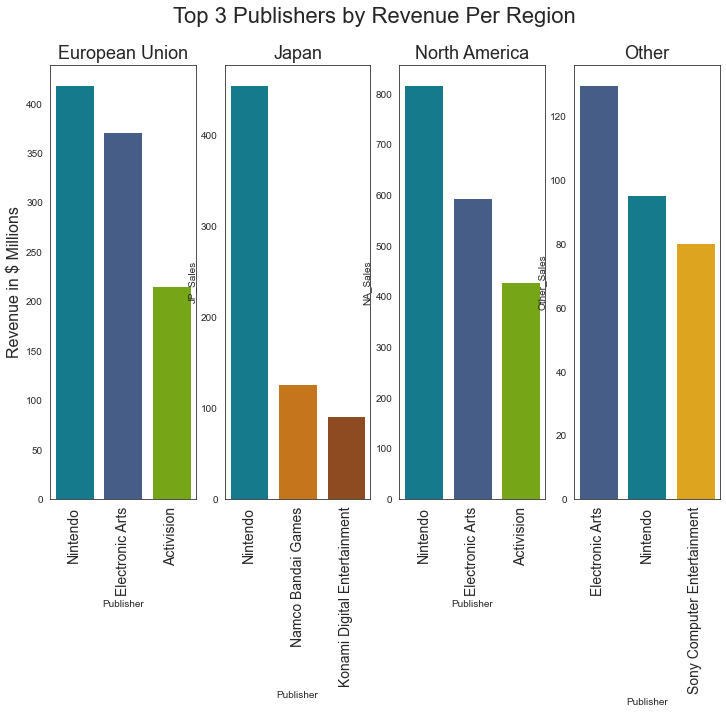

In [189]:
#各地区收入前三的发行商

EU = df.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_publishers = EU.index

JP = df.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_publishers = JP.index

NA = df.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_publishers = NA.index

Other = df.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_publishers = Other.index

colors =  {'Nintendo':sns.xkcd_rgb["teal blue"], 'Electronic Arts':sns.xkcd_rgb["denim blue"], 'Activision':sns.xkcd_rgb["dark lime green"], 'Namco Bandai Games':sns.xkcd_rgb["pumpkin"], 'Konami Digital Entertainment':sns.xkcd_rgb["burnt umber"], 'Sony Computer Entertainment':sns.xkcd_rgb["yellow orange"]}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_publishers, rotation=90, size=14)
sns.barplot(x=EU_publishers, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = JP_publishers, rotation=90, size=14)
sns.barplot(x=JP_publishers, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = NA_publishers, rotation=90, size=14)
sns.barplot(x=NA_publishers, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_publishers, rotation=90, size=14)
sns.barplot(x=Other_publishers, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Publishers by Revenue Per Region', size=22)
plt.show()

结论：
* EA游戏发行量最多，但多不代表销量好
* 任天堂年复一年的证明，他们的游戏质量是一流的，市场占有率处于龙头低位，名利双收
* 除任天堂外，暴雪、育碧、EA、索尼表现也不错

### 4. Genre

In [200]:
#全球销量最高的游戏类型

df_genre = df.groupby(df['Genre'])[['Global_Sales']].sum().rename(columns = {'Global_Sales':'sum'}).sort_values('sum', ascending = False)

fig = px.pie(df_genre, names=df_genre.index, values='sum', template='seaborn')
fig.update_traces(pull=[0.06,0.06,0.06,0.06,0.06],textposition='inside', textinfo="percent+label")
fig.show()

In [208]:
# 各区域最受欢迎的游戏类型

data_NA_Sales = df.groupby(by=['Genre'])['NA_Sales'].sum()
data_NA_Sales = data_NA_Sales.reset_index()
data_NA_Sales = data_NA_Sales.sort_values(by=['NA_Sales'], ascending=False)

data_EU_Sales = df.groupby(by=['Genre'])['EU_Sales'].sum()
data_EU_Sales = data_EU_Sales.reset_index()
data_EU_Sales = data_EU_Sales.sort_values(by=['EU_Sales'], ascending=False)

data_JP_Sales = df.groupby(by=['Genre'])['JP_Sales'].sum()
data_JP_Sales = data_JP_Sales.reset_index()
data_JP_Sales = data_JP_Sales.sort_values(by=['JP_Sales'], ascending=False)

data_platform = df.groupby(by=['Genre'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

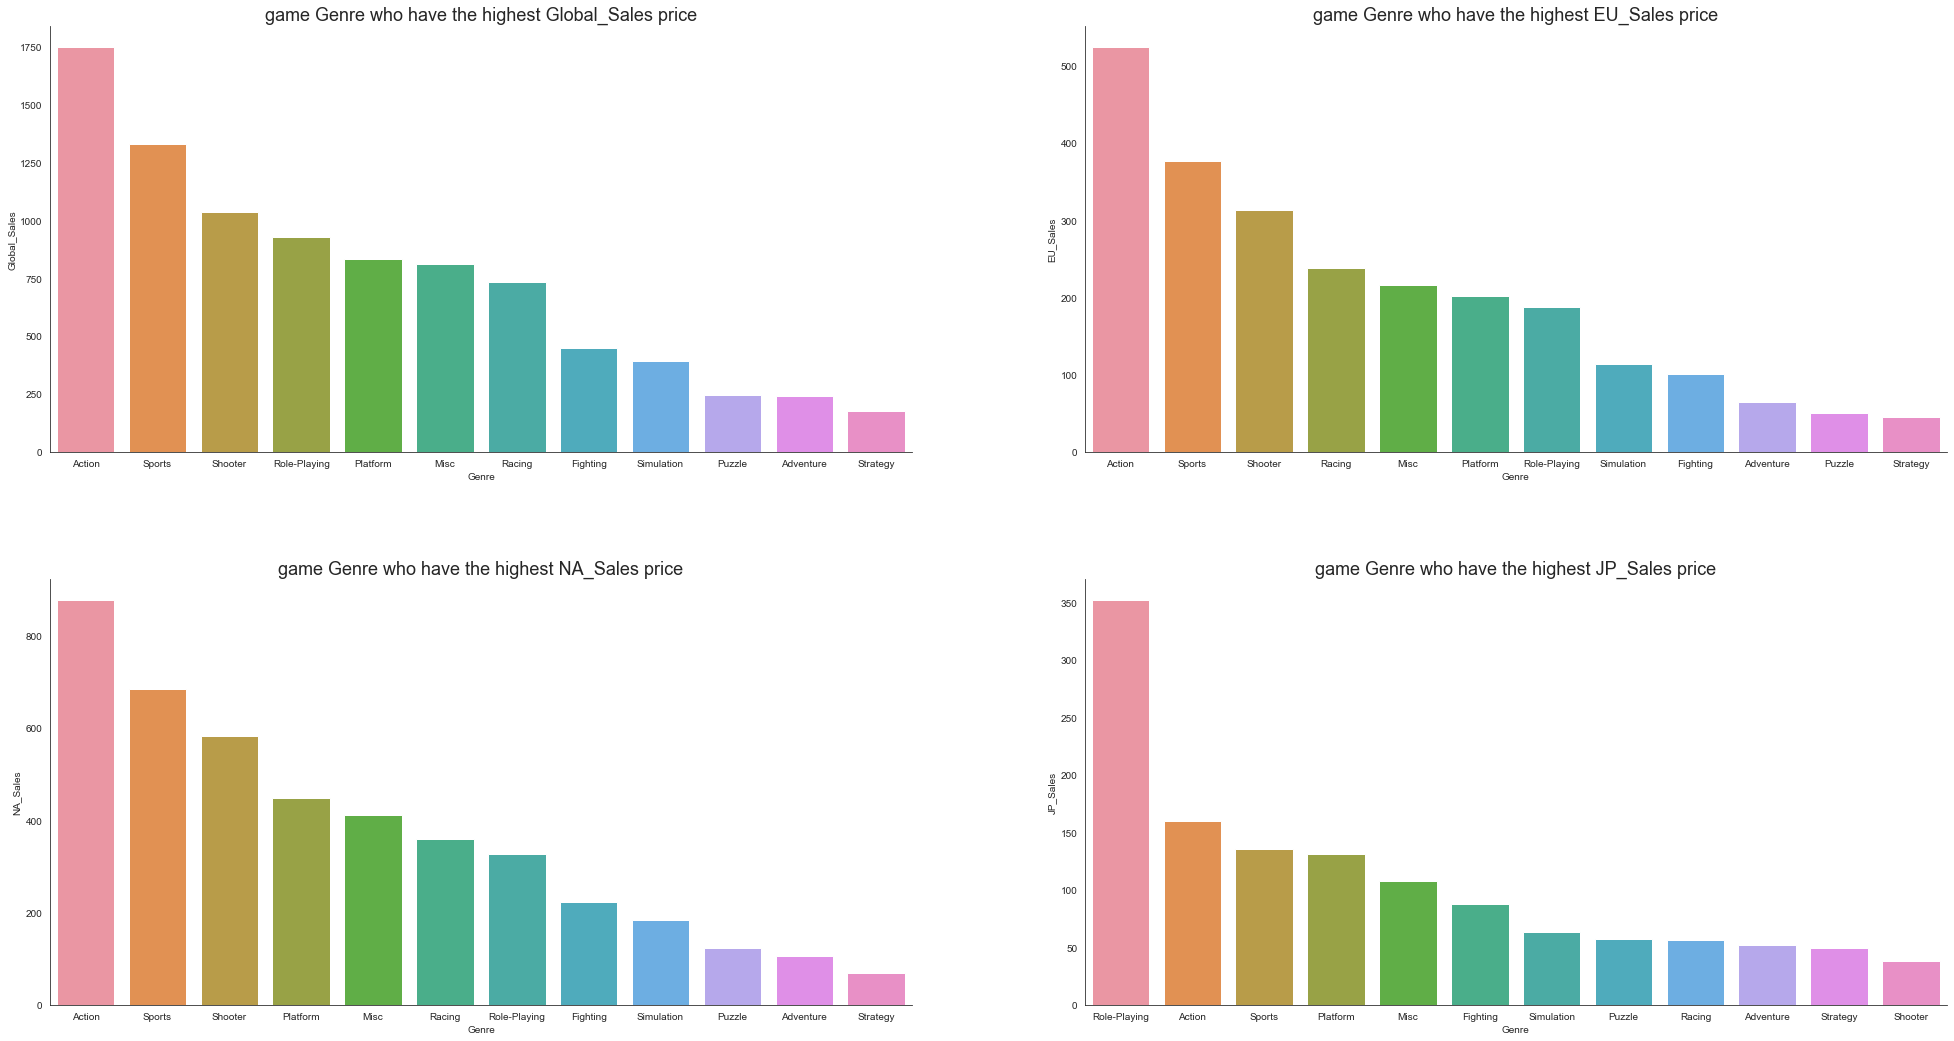

In [212]:
fig, axarr = plt.subplots(2, 2, figsize=(34, 18))

sns.barplot(x="Genre", y="Global_Sales", data=data_platform, ax=axarr[0][0])
axarr[0][0].set_title("game Genre who have the highest Global_Sales price", fontsize=18)

sns.barplot(x="Genre", y="NA_Sales", data=data_NA_Sales, ax=axarr[1][0])
axarr[1][0].set_title("game Genre who have the highest NA_Sales price", fontsize=18)

sns.barplot(x="Genre", y="EU_Sales", data=data_EU_Sales, ax=axarr[0][1])
axarr[0][1].set_title("game Genre who have the highest EU_Sales price", fontsize=18)

sns.barplot(x="Genre", y="JP_Sales", data=data_JP_Sales, ax=axarr[1][1])
axarr[1][1].set_title("game Genre who have the highest JP_Sales price", fontsize=18)

plt.subplots_adjust(hspace=.3)

sns.despine()

结论：
* 动作类游戏最受欢迎，其次是运动类和射击类
* 在北美和欧洲，动作型游戏最受大众喜欢，其次是运动型。但是在日本，角色扮演类型游戏最受大众喜欢

### 5. 玩家最喜爱的游戏

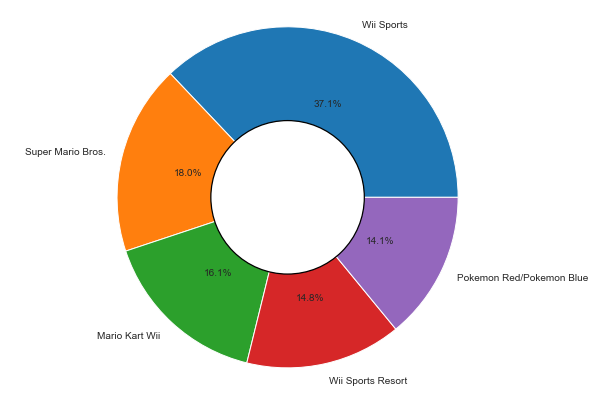

In [207]:
game = df.loc[:,['Name','Global_Sales']]
game = game.sort_values('Global_Sales', ascending=False)
game = game.head()

fig = plt.figure(figsize=(10,7))
plt.pie(game['Global_Sales'], labels=game['Name'], autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

总结：
* 对于视频游戏来说，2008年是个分水岭，推测可能是受金融危机的影响。从1980年起销售额缓慢上涨到2008年后跳水，游戏行业经历了不少的苦难，2013年发布的GTAV给市场带来新的活力，但是之后又无奈继续下行。
* 在视频游戏繁荣时期，action类游戏成为大众欢迎的类型，其次是运动类和射击类。
* 北美各类游戏销售情况都不错，而在日本只有角色扮演类游戏销售额较高，在欧洲较为畅销的是则是动作类及体育类游戏。
* 各大游戏厂商应该进一步挖掘销量下滑原因，视频游戏的颓势是否与近年PC端、手游的爆发式发展有关，并针对性采取措施。
* 在销量方面，任天堂，EA，暴雪占据前三，且差距显著。单从收入方面来说，任天堂是当之无愧的龙头老大。

### 相关性探索

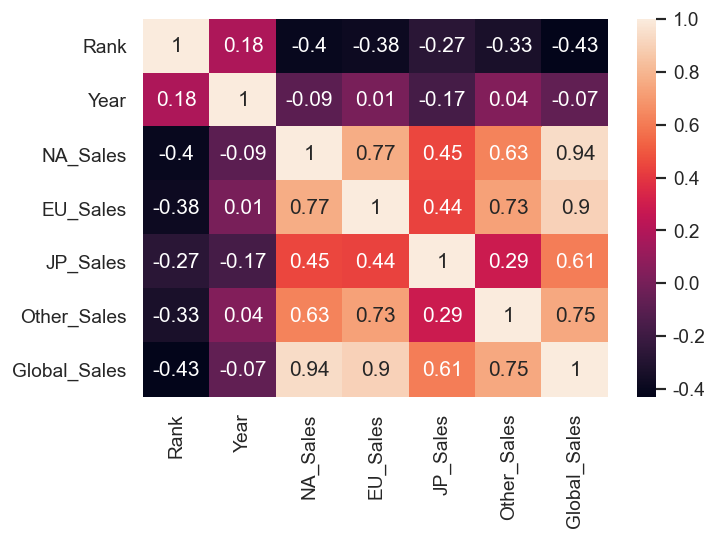

In [312]:
# 热力图 
plt.figure(dpi=125)
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

可以看出，北美及欧洲市场的销售额对全球销售额的影响最大，其他市场其次。
接下来看看各区域销售额对全球销售额的关系：

Text(0.5, 1.0, 'Global Sales - NA Sales ')

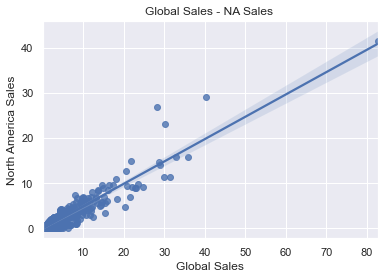

In [332]:
sns.set()
sns.regplot(df['Global_Sales'],df['NA_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('North America Sales')
plt.title('Global Sales - NA Sales ')

Text(0.5, 1.0, 'Global Sales - EU Sales ')

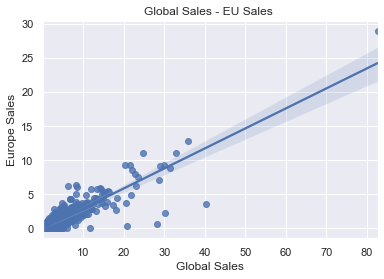

In [333]:
sns.regplot(df['Global_Sales'], df['EU_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('Europe Sales')
plt.title('Global Sales - EU Sales ')

Text(0.5, 1.0, 'Global Sales - JP Sales ')

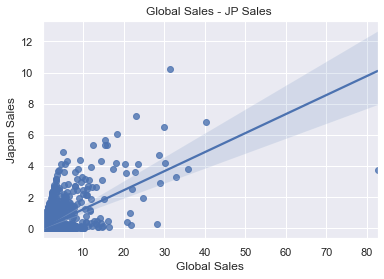

In [334]:
sns.regplot(df['Global_Sales'],df['JP_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('Japan Sales')
plt.title('Global Sales - JP Sales ')

Text(0.5, 1.0, 'Global Sales - Others Sales ')

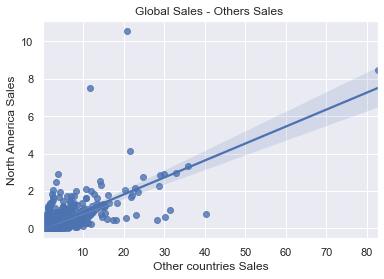

In [335]:
sns.regplot(df['Global_Sales'],df['Other_Sales'])
plt.xlabel('Other countries Sales')
plt.ylabel('North America Sales')
plt.title('Global Sales - Others Sales ')

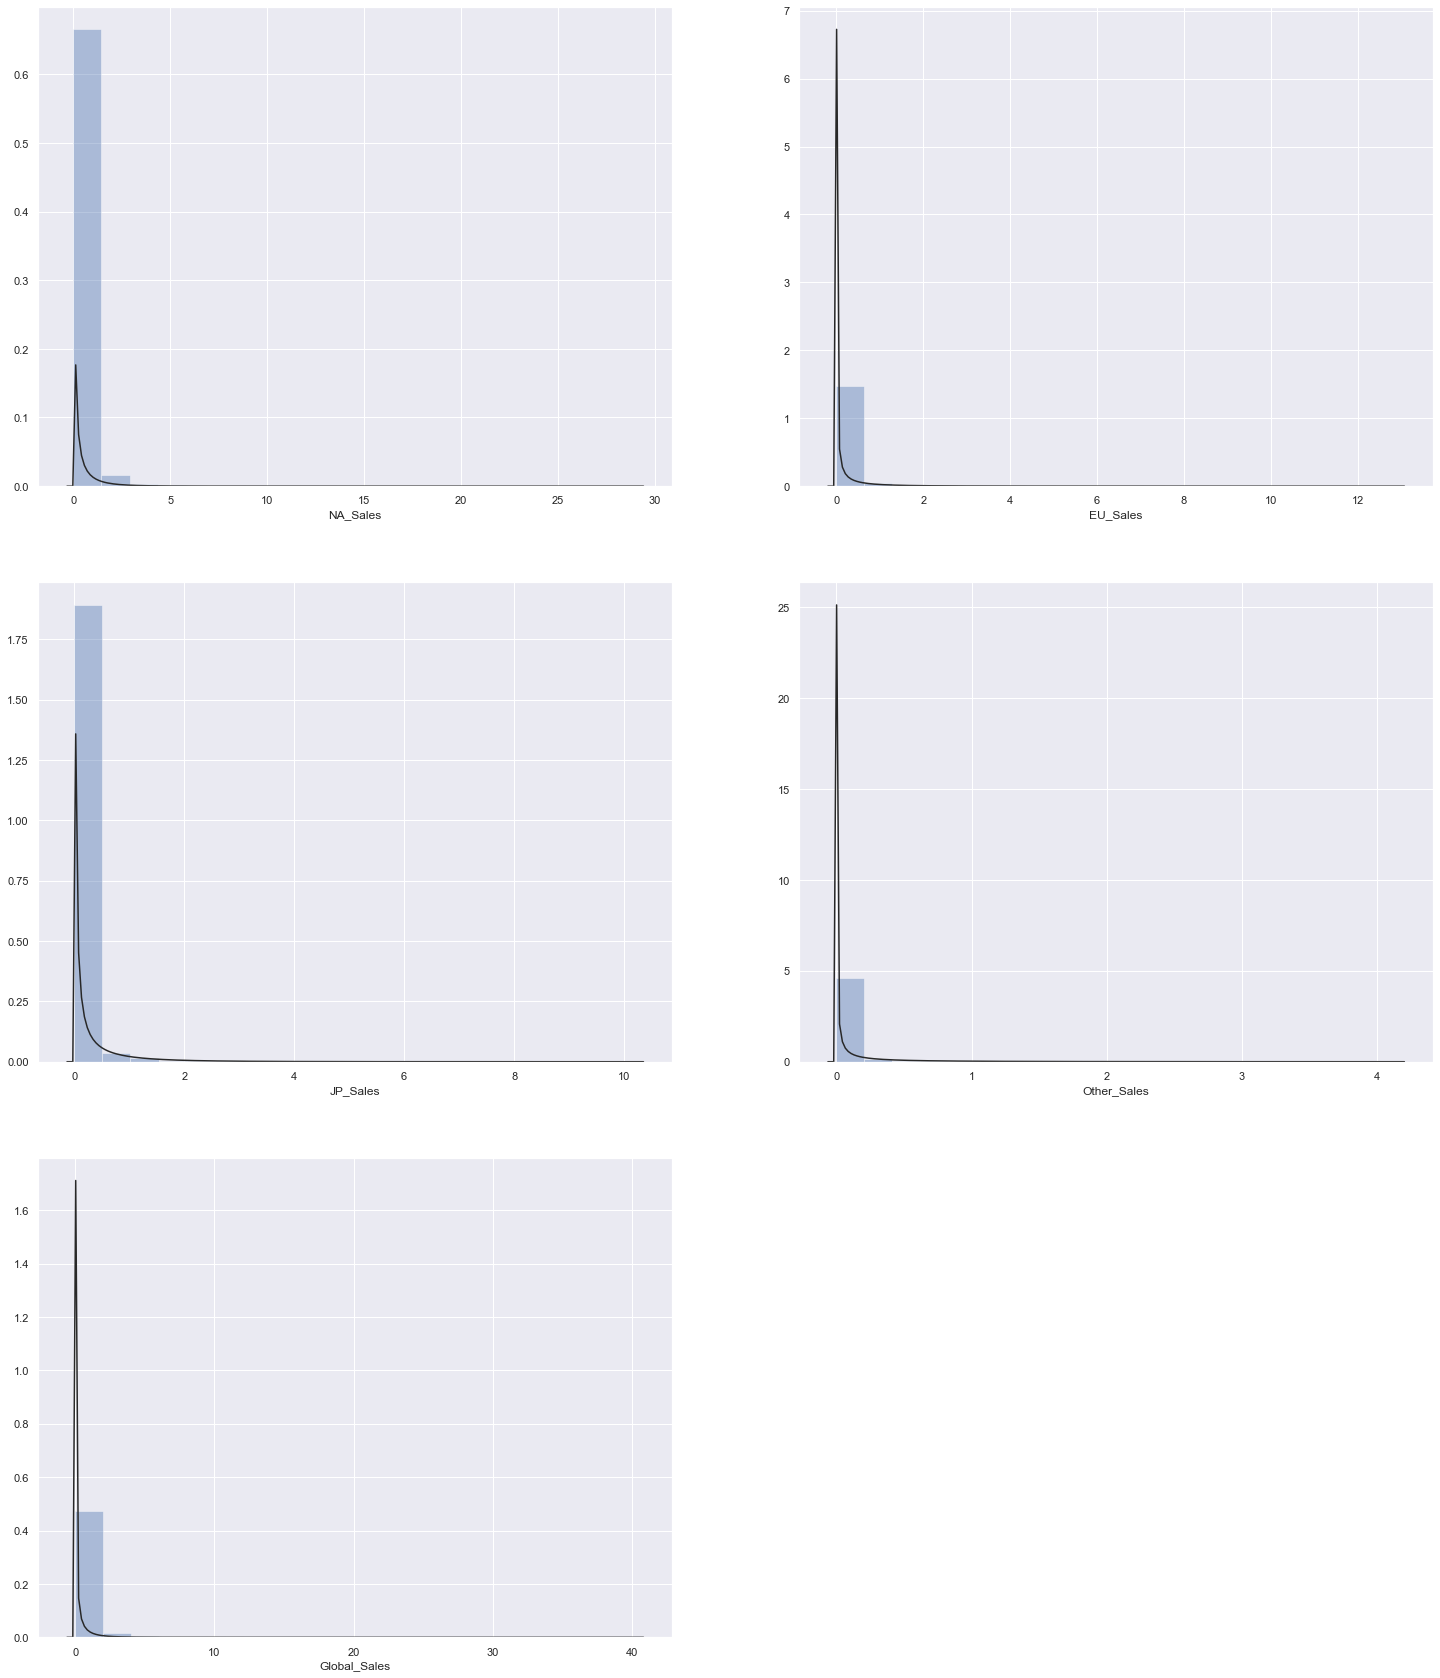

In [336]:
#检测变量是否符合正态分布

plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

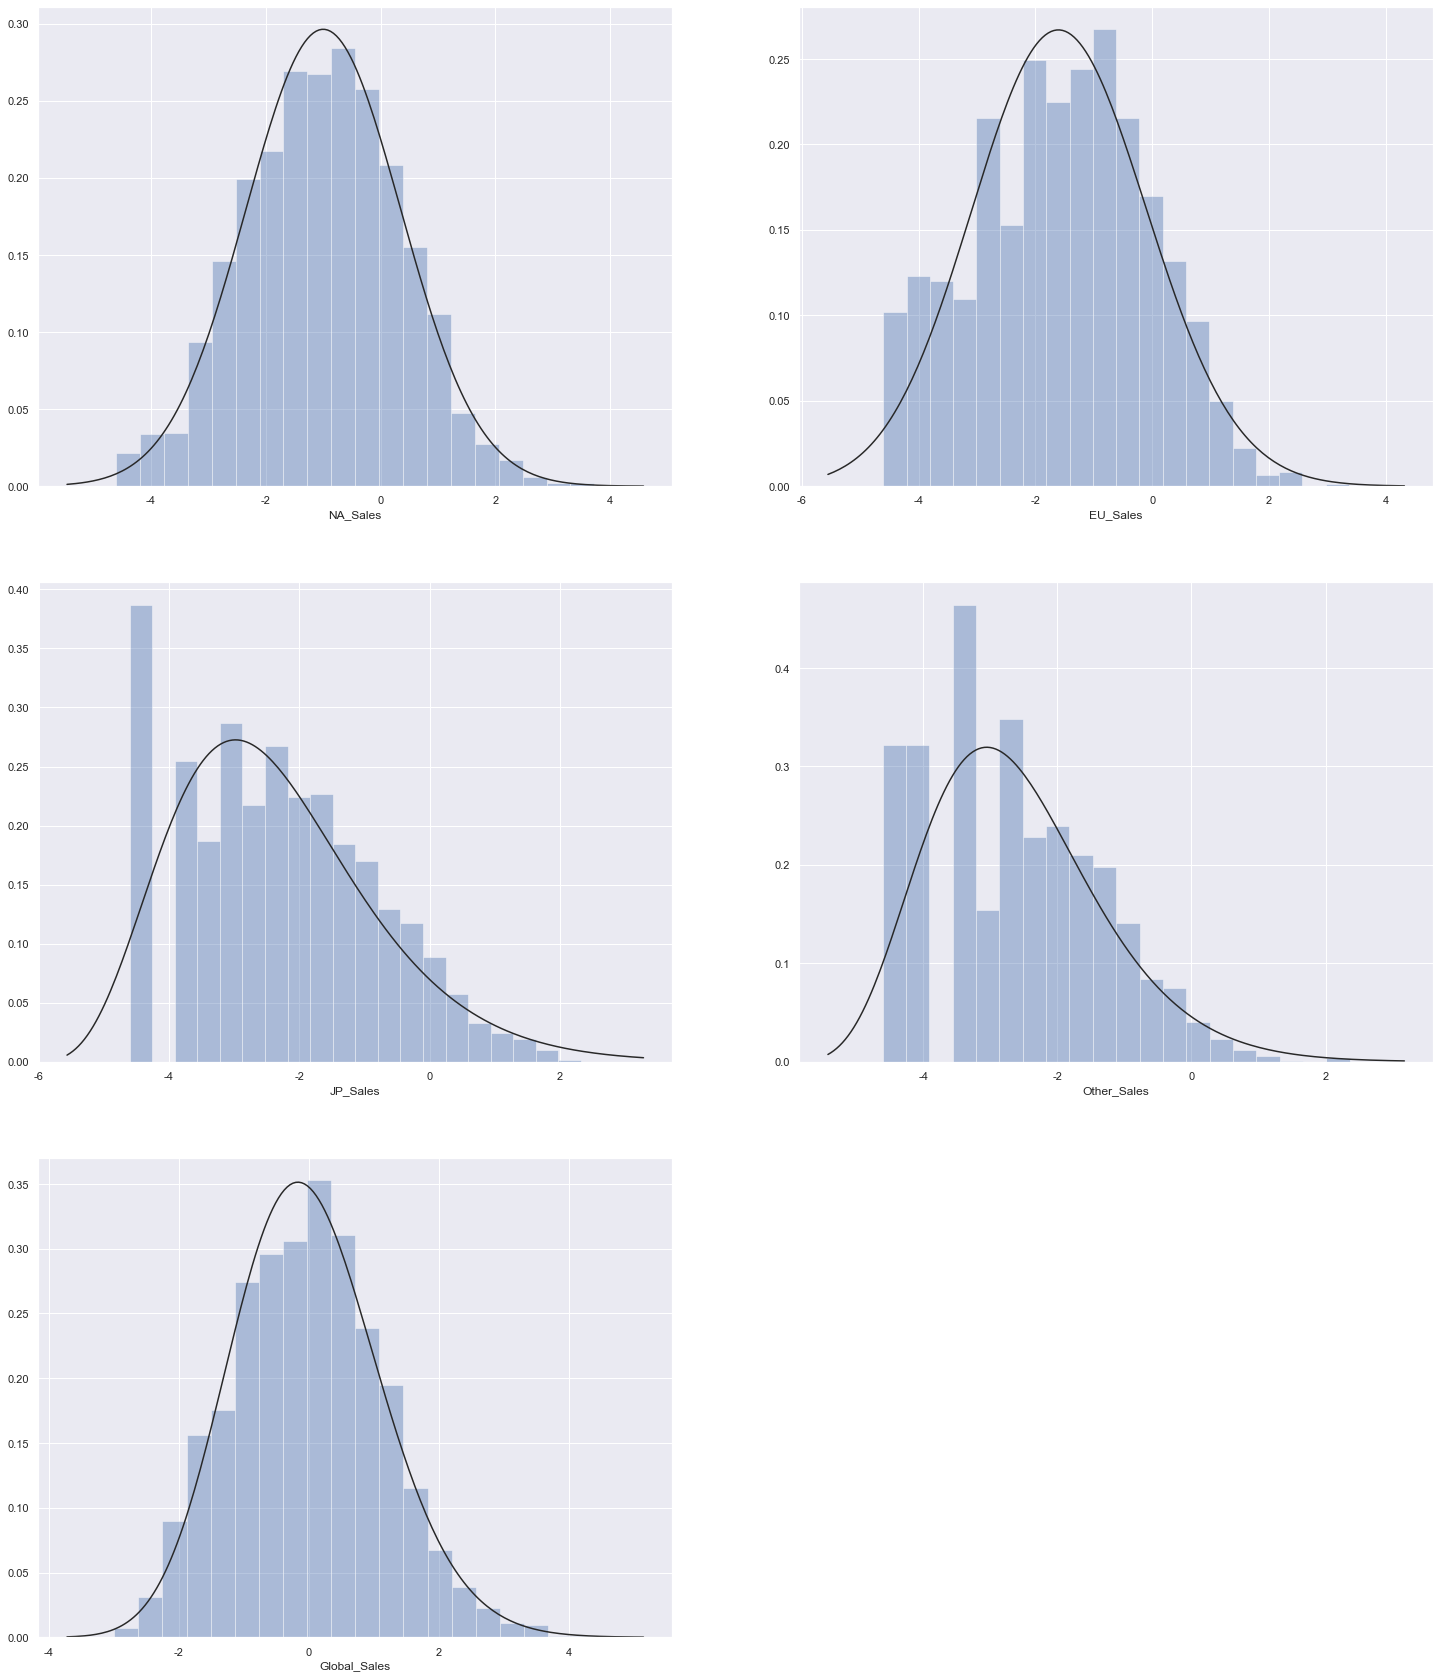

In [337]:
#对数变换

data_hist_log = df.copy()

data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

采用log对数变换对特征进行处理，可以看出所有数据都是右偏或者对称的。

In [341]:
df = data_hist_log

### 特征工程

In [342]:
#标签编码
from sklearn.preprocessing import LabelEncoder

data = df.copy()
le = LabelEncoder()
feature = ['Platform', 'Genre']

for col in feature:
    data[col] = le.fit_transform(df[col])

In [343]:
#分离预测值和特征值
X = data[['Platform' , 'Genre' , 'NA_Sales' , 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = data['Global_Sales'].values

In [344]:
#分离训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

In [345]:
#线性回归模型

from sklearn.linear_model import LinearRegression
# Import r2 score for Calculation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
r2_MultiLinear = r2_score(y_test,pred)

In [346]:
print(r2_MultiLinear)

print(lr.score(X_test, y_test))

0.9999986370225027
0.9999986370225027


项目完成。